In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv('heart_disease_risk.csv')

print(df,df.shape)

       Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0             0.0                  0.0      0.0           1.0        0.0   
1             0.0                  1.0      0.0           1.0        0.0   
2             1.0                  0.0      0.0           1.0        0.0   
3             1.0                  1.0      0.0           1.0        0.0   
4             0.0                  0.0      1.0           0.0        1.0   
...           ...                  ...      ...           ...        ...   
69995         0.0                  0.0      1.0           0.0        0.0   
69996         1.0                  1.0      1.0           0.0        1.0   
69997         0.0                  0.0      0.0           0.0        0.0   
69998         1.0                  1.0      0.0           1.0        1.0   
69999         1.0                  1.0      1.0           1.0        1.0   

       Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0           0.0    

In [23]:
#Data Exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())


Dataset Shape: (70000, 19)

First 5 Rows:
    Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0                  1.0      0.0           1.0        0.0   
2         1.0                  0.0      0.0           1.0        0.0   
3         1.0                  1.0      0.0           1.0        0.0   
4         0.0                  0.0      1.0           0.0        1.0   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0       0.0                 0.0                 0.0      0.0   
1       0.0                 0.0                 0.0      1.0   
2       0.0                 0.0                 0.0      1.0   
3       0.0                 1.0                 1.0      1.0   
4       0.0                 0.0                 0.0      0.0   

   High_Cholesterol  Diabetes  Smoking  Obesity  Sedentary_Lifestyle  \
0               0.0       0.0      1.0      0.0                  1.

In [24]:
# Handling Missing Data
# Check for missing values in each column
missing_data = df.isnull().sum()

print("\nMissing Values in Each Column:\n", missing_data)


Missing Values in Each Column:
 Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64


In [25]:
# Verify if the dataset is completely clean
if missing_data.sum() == 0:
    print("\n✅ No missing values found in the dataset!")
else:
    print("\n⚠️ Missing values detected, consider handling them (drop/impute).")


✅ No missing values found in the dataset!


In [26]:
# Assuming df is already your cleaned DataFrame
output_path = "missaing_data_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved as: {output_path}")

✅ Cleaned dataset saved as: missaing_data_cleaned.csv


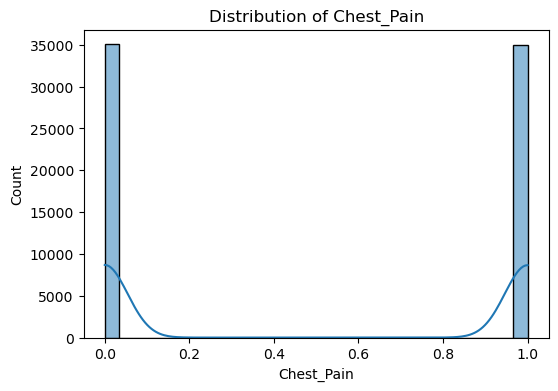

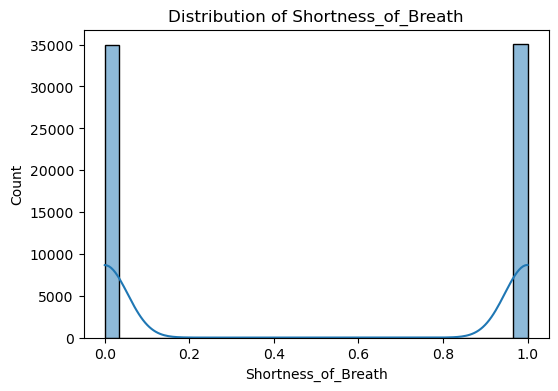

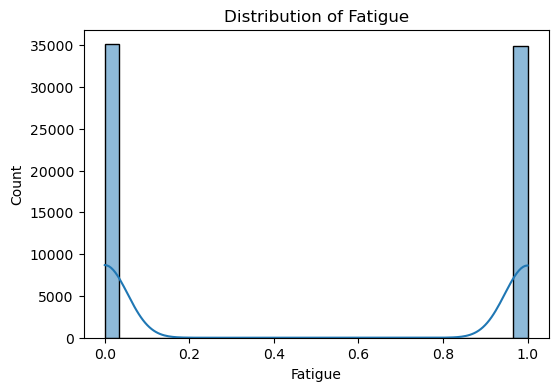

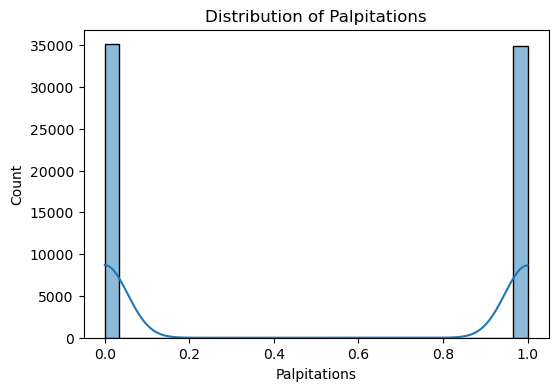

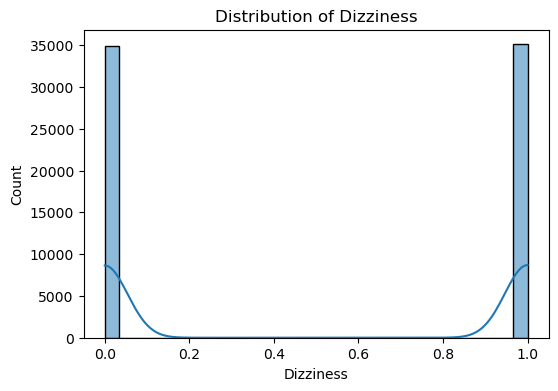

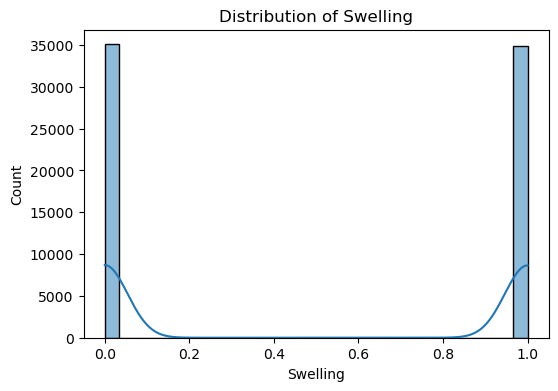

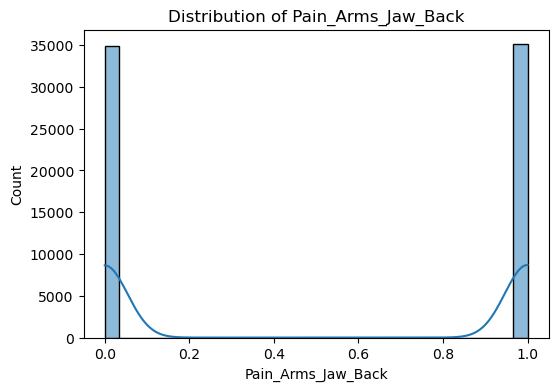

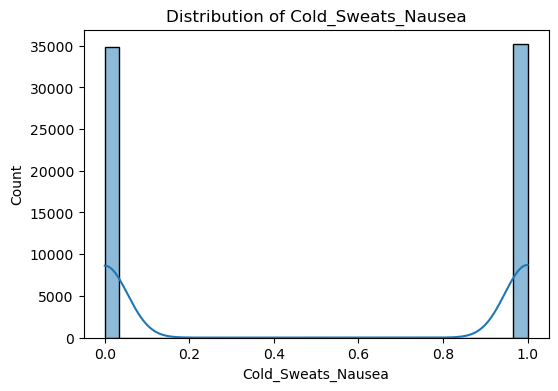

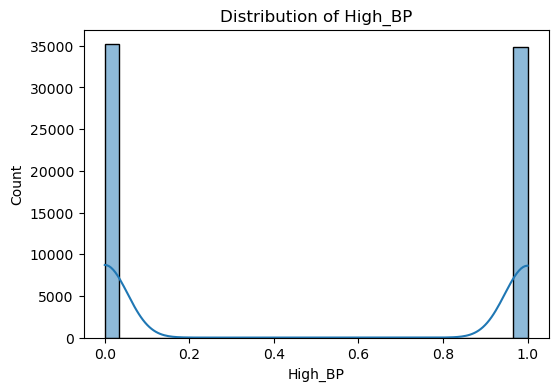

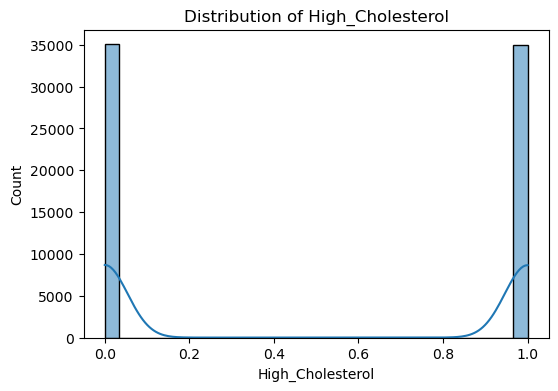

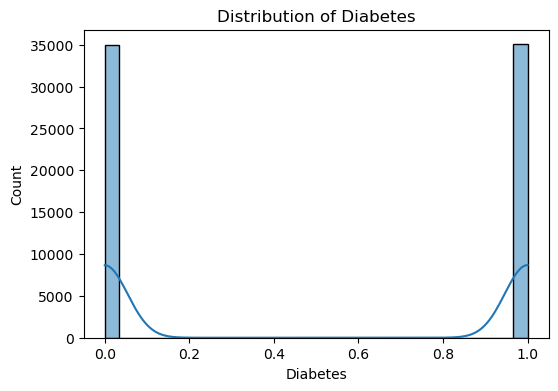

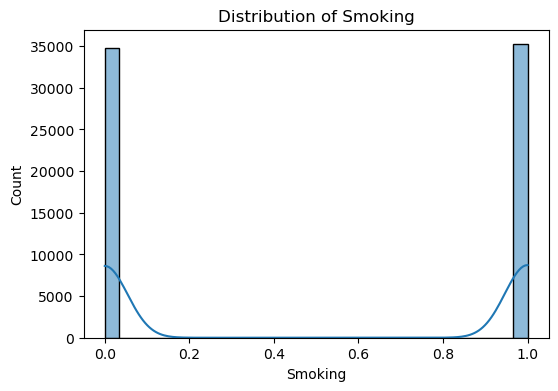

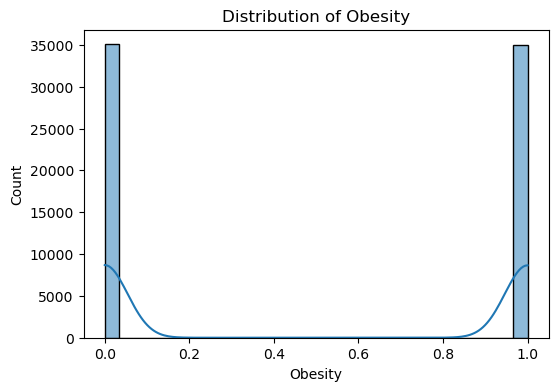

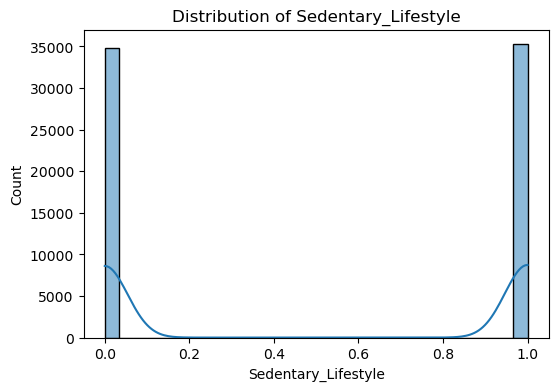

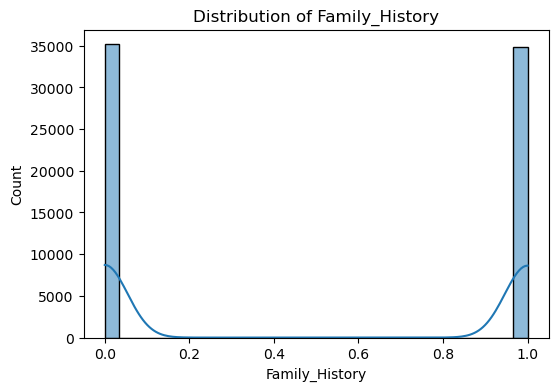

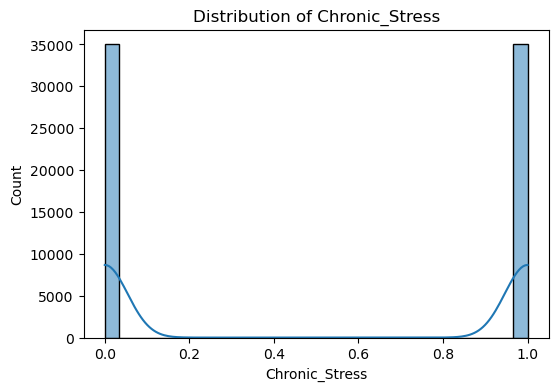

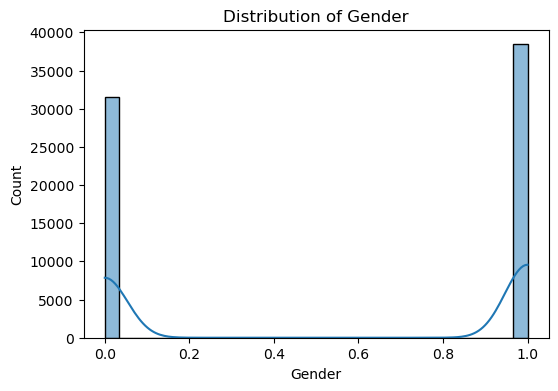

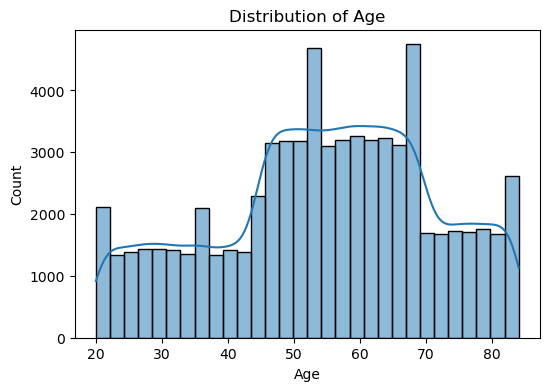

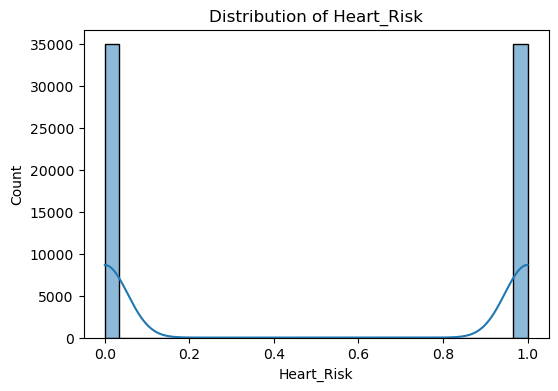

In [27]:
import seaborn as sns

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()



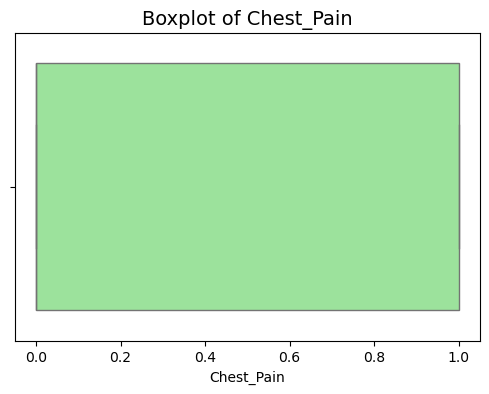

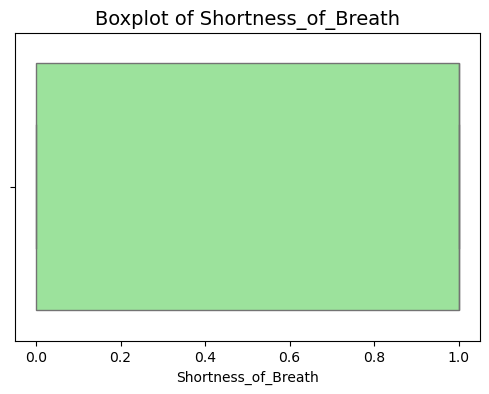

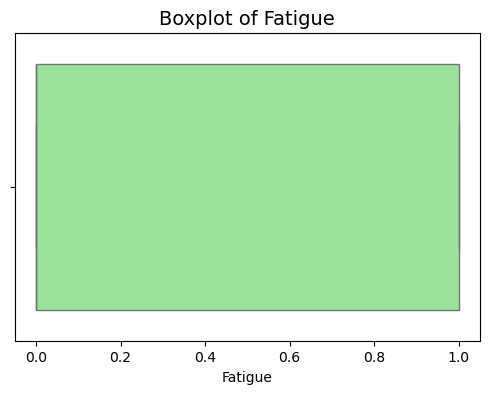

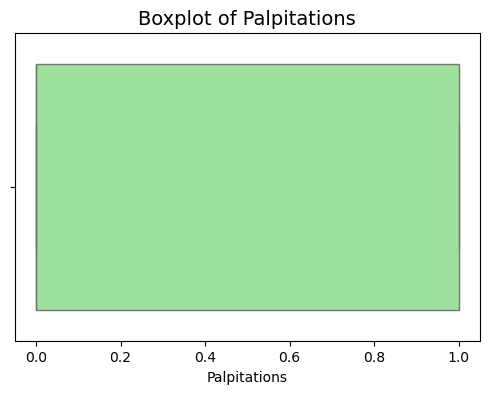

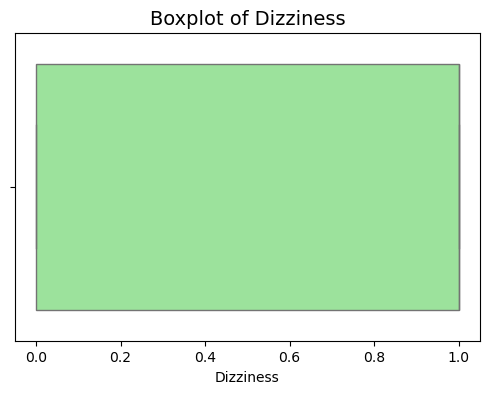

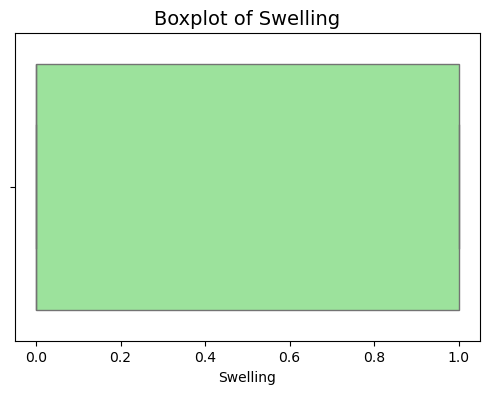

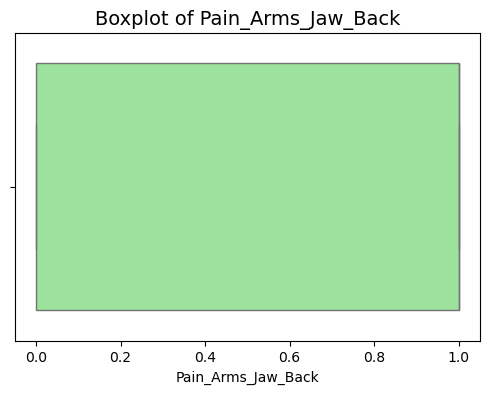

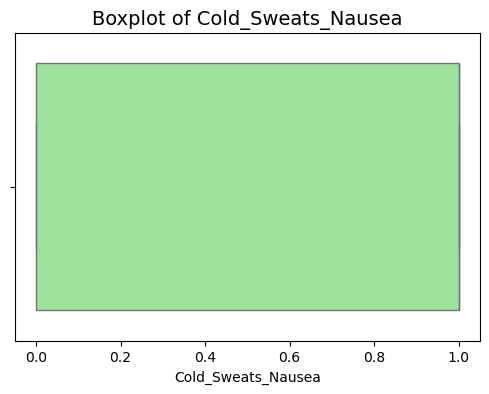

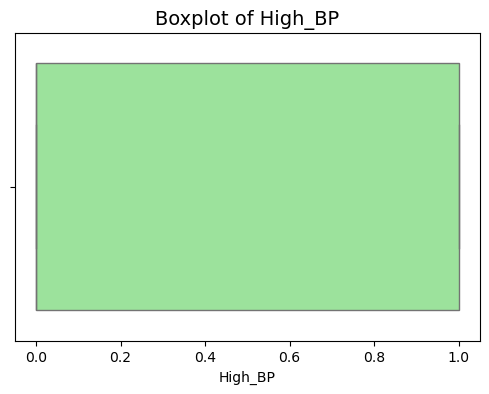

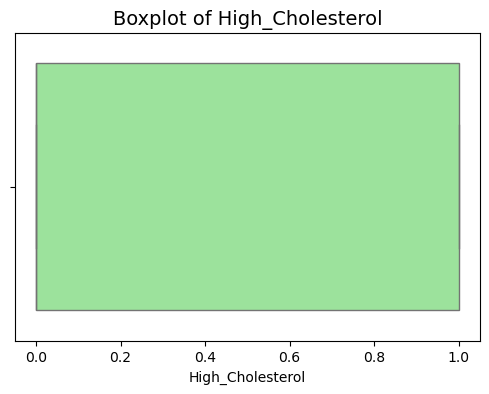

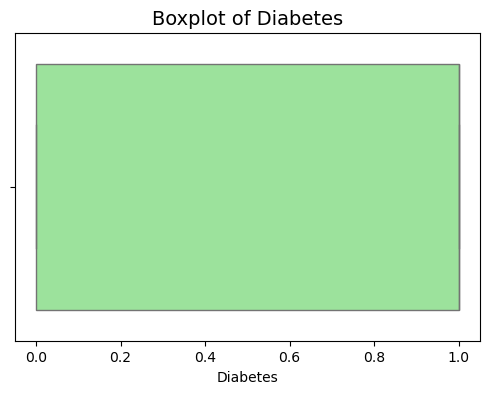

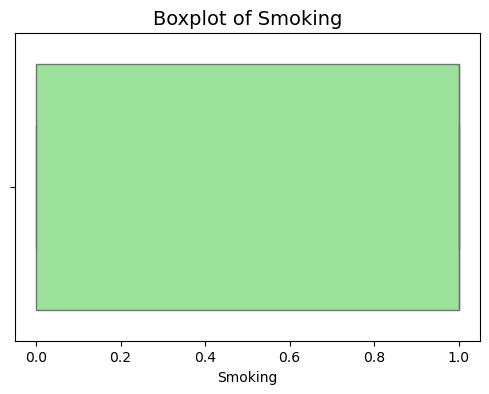

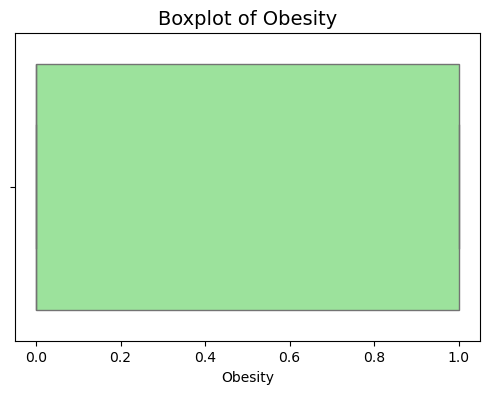

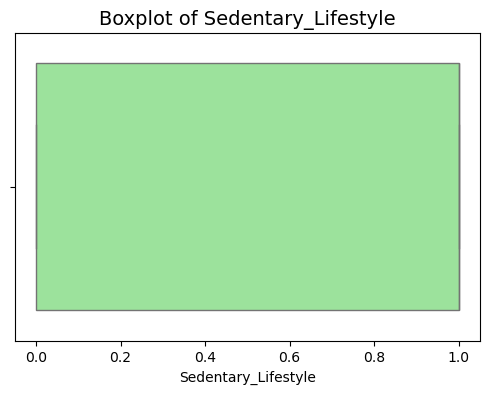

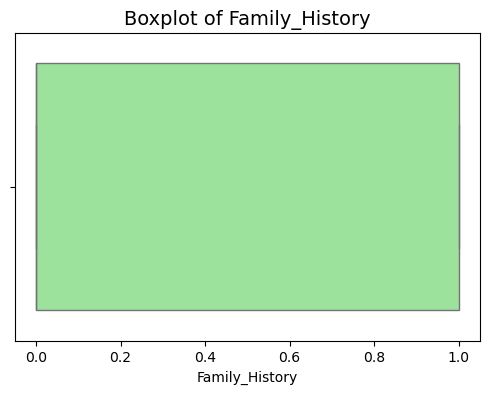

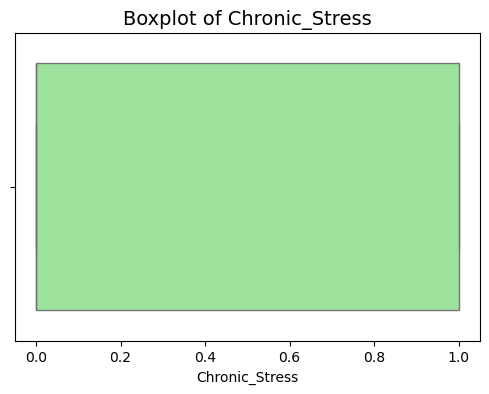

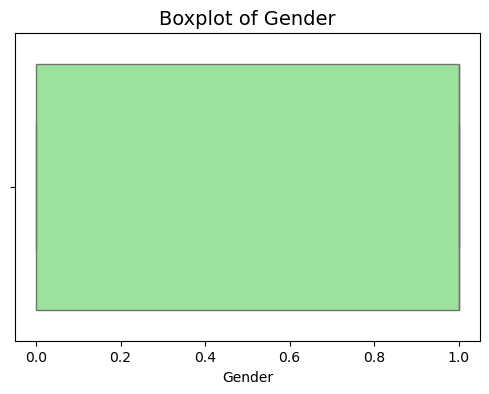

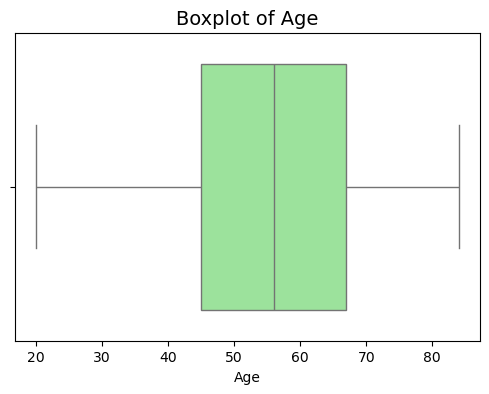

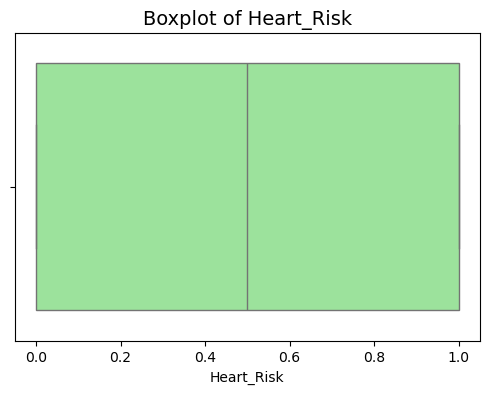

In [28]:
#Boxplots for numeric features

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.show()



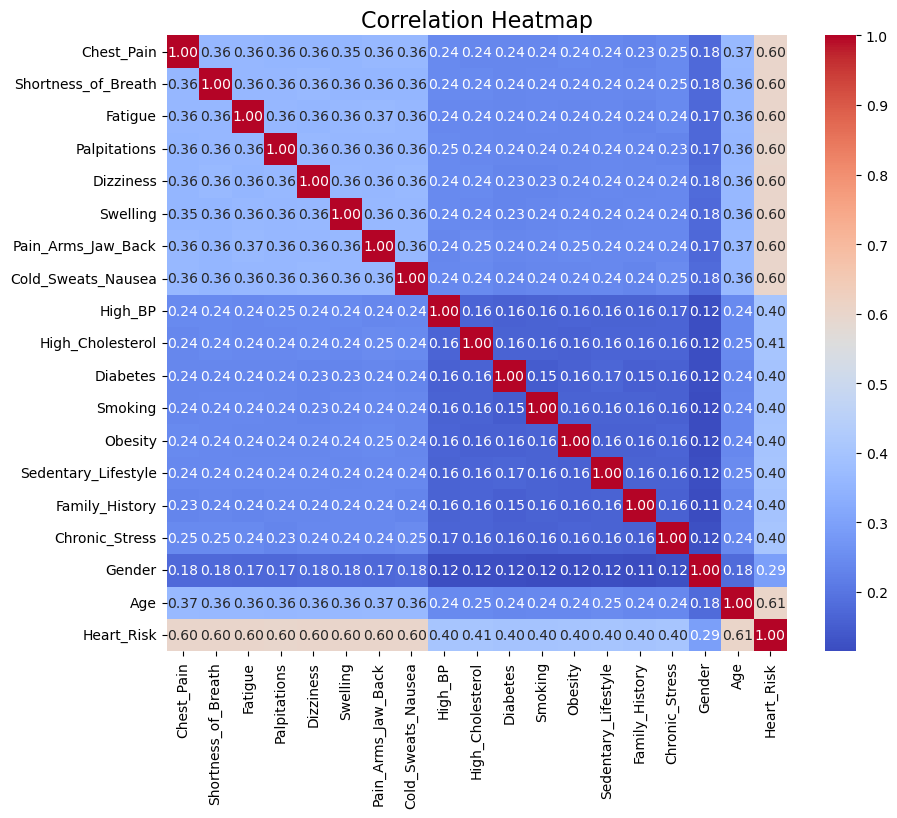

In [29]:
#Correlation heatmap (numeric features only)

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

C:\Users\Janidu\AppData\Local\Temp\ipykernel_3460\1092674709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart_Risk", data=df, palette="Set2")


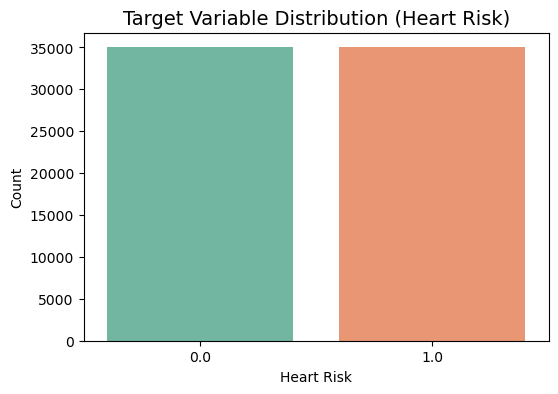

In [30]:
#Target variable distribution- shows balance of classes

if "Heart_Risk" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Heart_Risk", data=df, palette="Set2")
    plt.title("Target Variable Distribution (Heart Risk)", fontsize=14)
    plt.xlabel("Heart Risk")
    plt.ylabel("Count")
    plt.show()

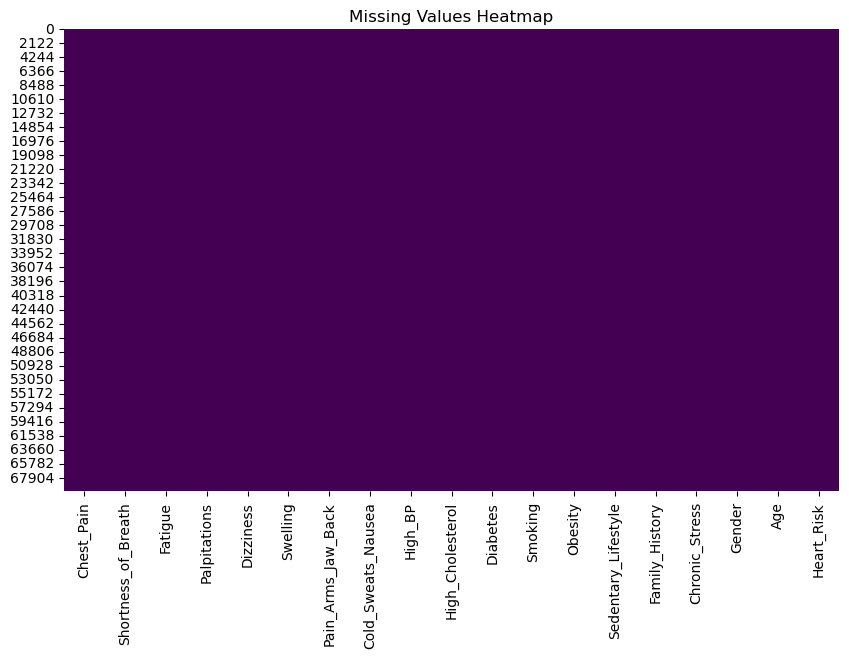

In [31]:
#Missing Values Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


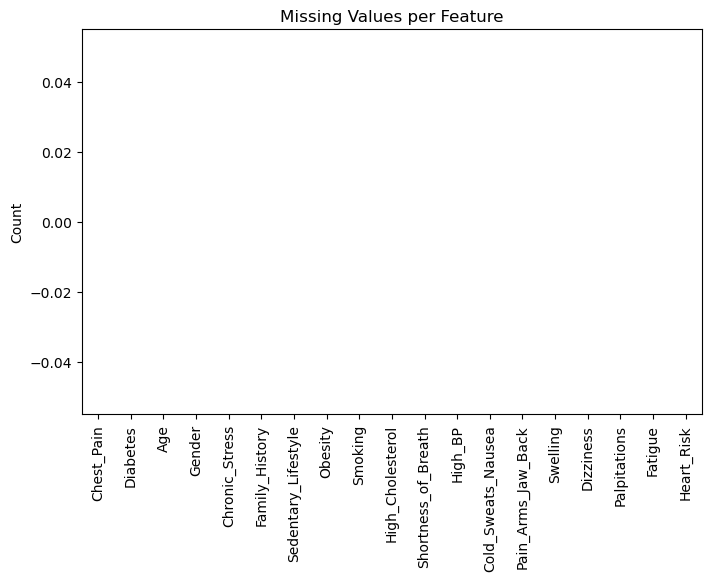

In [33]:
#Barplot of Missing Values

import matplotlib.pyplot as plt

missing = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing.plot(kind="bar")
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.show()



In [35]:
#Imports and Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# Set seaborn style
sns.set(style='whitegrid', palette="husl")

# Load dataset
df = pd.read_csv('missaing_data_cleaned.csv')

#Basic info
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)

# Identify numerical columns that are likely categorical
suspected_categorical = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() <= 10:
        unique_vals = sorted(df[col].unique())
        print(f"\n{col}: {unique_vals} (likely categorical)")
        suspected_categorical.append(col)

print(f"\nSuspected categorical features: {suspected_categorical}")

Dataset shape: (70000, 19)

Data types:
Chest_Pain             float64
Shortness_of_Breath    float64
Fatigue                float64
Palpitations           float64
Dizziness              float64
Swelling               float64
Pain_Arms_Jaw_Back     float64
Cold_Sweats_Nausea     float64
High_BP                float64
High_Cholesterol       float64
Diabetes               float64
Smoking                float64
Obesity                float64
Sedentary_Lifestyle    float64
Family_History         float64
Chronic_Stress         float64
Gender                 float64
Age                    float64
Heart_Risk             float64
dtype: object

Chest_Pain: [0.0, 1.0] (likely categorical)

Shortness_of_Breath: [0.0, 1.0] (likely categorical)

Fatigue: [0.0, 1.0] (likely categorical)

Palpitations: [0.0, 1.0] (likely categorical)

Dizziness: [0.0, 1.0] (likely categorical)

Swelling: [0.0, 1.0] (likely categorical)

Pain_Arms_Jaw_Back: [0.0, 1.0] (likely categorical)

Cold_Sweats_Nausea: [0.0, 1.

In [36]:
# Copy dataframe for interpreted labels
df_interpreted = df.copy()


# Example mappings (only for binary and chest pain)
categorical_mappings = {
    'Gender': {0: 'Female', 1: 'Male'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'Diabetes': {0: 'No', 1: 'Yes'},
    'High_BP': {0: 'No', 1: 'Yes'},
    'High_Cholesterol': {0: 'No', 1: 'Yes'},
    'Obesity': {0: 'No', 1: 'Yes'},
    'Sedentary_Lifestyle': {0: 'No', 1: 'Yes'},
    'Family_History': {0: 'No', 1: 'Yes'},
    'Chronic_Stress': {0: 'No', 1: 'Yes'},
    'Chest_Pain': {0: 'Typical', 1: 'Atypical', 2: 'Non-anginal', 3: 'Asymptomatic'},
    'Heart_Risk': {0: 'Low', 1: 'High'}
}

# Apply reverse mapping to create interpretable categories
for col, mapping in categorical_mappings.items():
    if col in df.columns:
        df_interpreted[f'{col}_Label'] = df[col].map(mapping)
        print(f"Created {col}_Label from {col}")

Created Gender_Label from Gender
Created Smoking_Label from Smoking
Created Diabetes_Label from Diabetes
Created High_BP_Label from High_BP
Created High_Cholesterol_Label from High_Cholesterol
Created Obesity_Label from Obesity
Created Sedentary_Lifestyle_Label from Sedentary_Lifestyle
Created Family_History_Label from Family_History
Created Chronic_Stress_Label from Chronic_Stress
Created Chest_Pain_Label from Chest_Pain
Created Heart_Risk_Label from Heart_Risk


In [37]:
# Now demonstrate various encoding methods
print("=== ENCODING DEMONSTRATION ===")

# 1. Label Encoding (already applied for binary features)
binary_features = [c for c in suspected_categorical if df[c].nunique() == 2]
for col in binary_features:
    print(f"{col}: {df[col].unique()} (binary)")

# 2. One-Hot Encoding example for Chest_Pain (multi-class)
if 'Chest_Pain' in df.columns:
    chest_pain_onehot = pd.get_dummies(df_interpreted['Chest_Pain_Label'], prefix='Chest_Pain', drop_first=True)
    print("\nOne-Hot Encoding Demo for Chest_Pain:")
    print(chest_pain_onehot.head())

# 3. Ordinal Encoding – Not applicable (no ordinal categorical in our dataset)
print("\nOrdinal Encoding Example: (Not applicable in this dataset)")

=== ENCODING DEMONSTRATION ===
Chest_Pain: [0. 1.] (binary)
Shortness_of_Breath: [0. 1.] (binary)
Fatigue: [0. 1.] (binary)
Palpitations: [1. 0.] (binary)
Dizziness: [0. 1.] (binary)
Swelling: [0. 1.] (binary)
Pain_Arms_Jaw_Back: [0. 1.] (binary)
Cold_Sweats_Nausea: [0. 1.] (binary)
High_BP: [0. 1.] (binary)
High_Cholesterol: [0. 1.] (binary)
Diabetes: [0. 1.] (binary)
Smoking: [1. 0.] (binary)
Obesity: [0. 1.] (binary)
Sedentary_Lifestyle: [1. 0.] (binary)
Family_History: [0. 1.] (binary)
Chronic_Stress: [0. 1.] (binary)
Gender: [0. 1.] (binary)
Heart_Risk: [0. 1.] (binary)

One-Hot Encoding Demo for Chest_Pain:
   Chest_Pain_Typical
0                True
1                True
2               False
3               False
4                True

Ordinal Encoding Example: (Not applicable in this dataset)


In [38]:
#Encoding Comparison
print("\n=== ENCODING COMPARISON ===")

# Original categorical subset
original_categorical = df[suspected_categorical]

# One-hot encode all interpreted categorical labels
label_cols = [col+'_Label' for col in categorical_mappings.keys() if col+'_Label' in df_interpreted.columns]
df_onehot = pd.get_dummies(df_interpreted[label_cols], drop_first=True)

print(f"Original shape: {original_categorical.shape}")
print(f"One-hot shape: {df_onehot.shape}")
print(f"Memory usage - Original: {original_categorical.memory_usage(deep=True).sum()} bytes")
print(f"Memory usage - One-hot: {df_onehot.memory_usage(deep=True).sum()} bytes")


=== ENCODING COMPARISON ===
Original shape: (70000, 18)
One-hot shape: (70000, 11)
Memory usage - Original: 10080132 bytes
Memory usage - One-hot: 770132 bytes


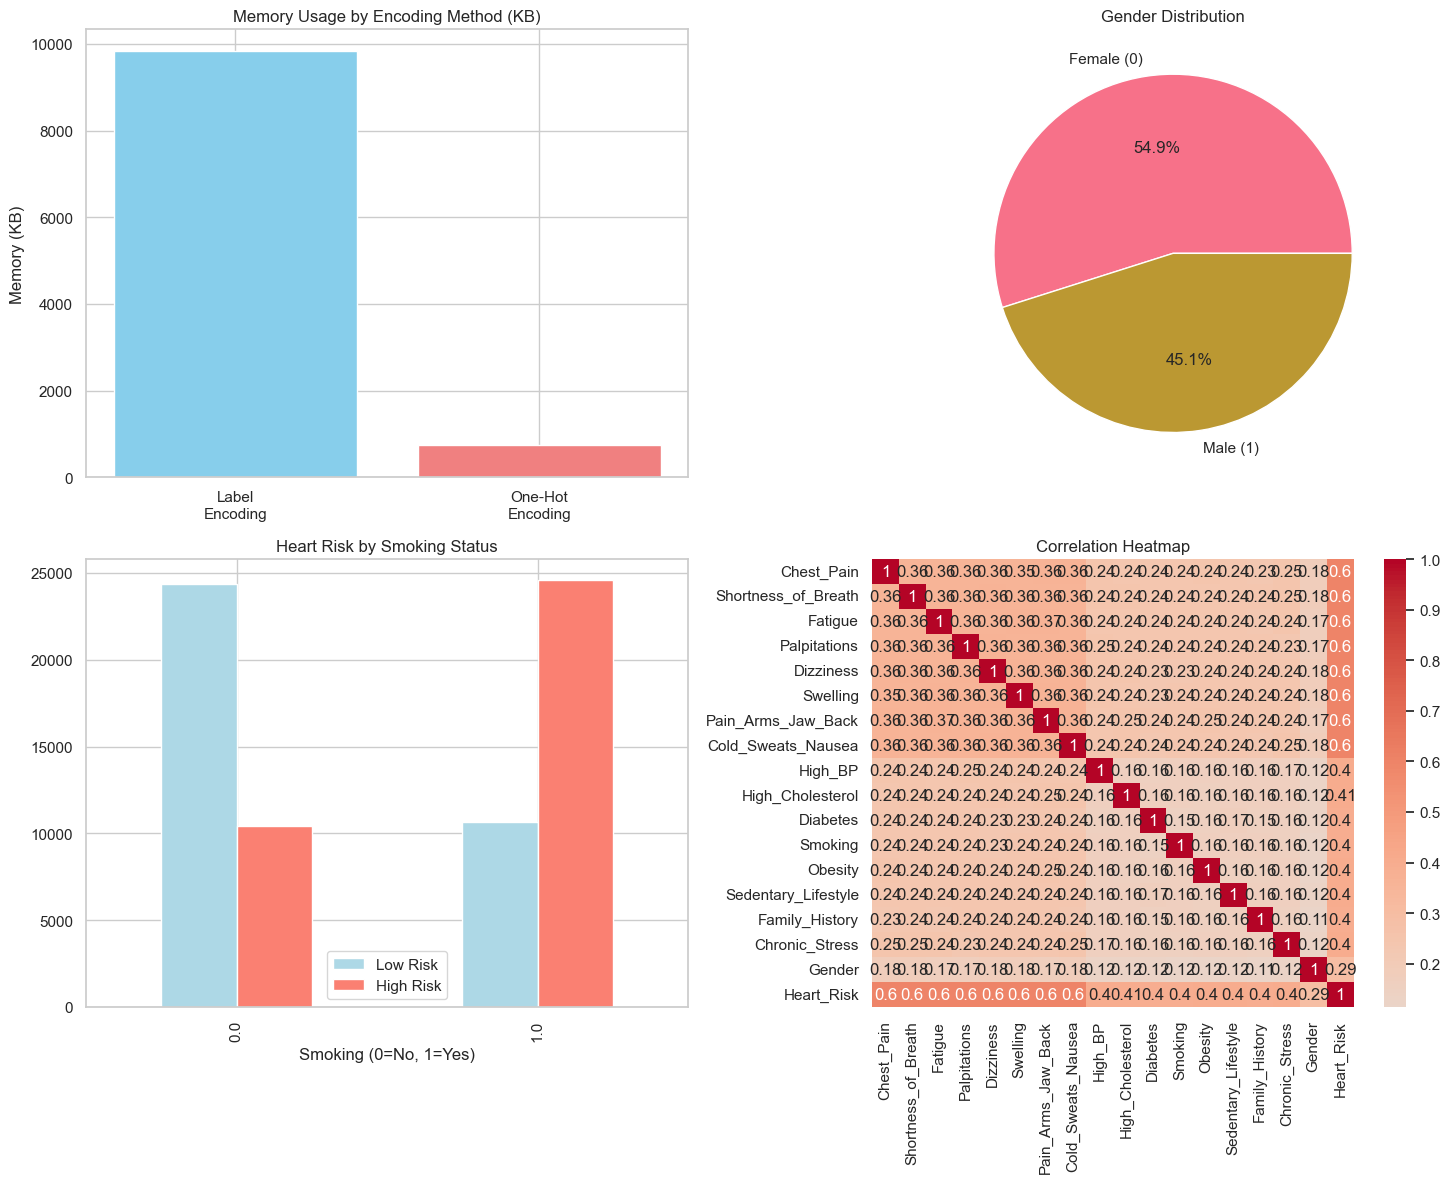

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Memory Usage by Encoding
methods = ['Label\nEncoding', 'One-Hot\nEncoding']
memory_usage = [
    original_categorical.memory_usage(deep=True).sum()/1024,
    df_onehot.memory_usage(deep=True).sum()/1024
]
axes[0,0].bar(methods, memory_usage, color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Memory Usage by Encoding Method (KB)')
axes[0,0].set_ylabel('Memory (KB)')

# 2. Gender Distribution
if 'Gender' in df.columns:
    gender_dist = df['Gender'].value_counts()
    axes[0,1].pie(gender_dist.values, labels=['Female (0)', 'Male (1)'], autopct='%1.1f%%')
    axes[0,1].set_title('Gender Distribution')

# 3. Heart Risk by Smoking
if 'Smoking' in df.columns and 'Heart_Risk' in df.columns:
    smoking_risk = pd.crosstab(df['Smoking'], df['Heart_Risk'])
    smoking_risk.plot(kind='bar', ax=axes[1,0], color=['lightblue','salmon'])
    axes[1,0].set_title('Heart Risk by Smoking Status')
    axes[1,0].set_xlabel('Smoking (0=No, 1=Yes)')
    axes[1,0].legend(['Low Risk','High Risk'])

# 4. Correlation Heatmap
if len(suspected_categorical) >= 3 and 'Heart_Risk' in df.columns:
    corr_matrix = df[suspected_categorical].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
    axes[1,1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [46]:
# CREATE AND SAVE PROCESSED CSV FILE
# =================================================================

print("\n" + "="*50)
print("CREATING PROCESSED DATASET")
print("="*50)

# Step 1: Create the final processed dataset
df_final = df.copy()  # Start with original data

# Step 2: Add all the interpretable labels created
for col, mapping in categorical_mappings.items():
    if col in df.columns:
        df_final[f'{col}_Label'] = df[col].map(mapping)
        print(f"✓ Added {col}_Label column")

# Step 3: Add one-hot encoded columns for multi-category features
if 'Chest_Pain' in df.columns:
    # Use df_final instead of undefined df_interpreted
    chest_pain_onehot = pd.get_dummies(df_final['Chest_Pain_Label'], 
                                       prefix='ChestPain', drop_first=True)
    
    # Add one-hot columns to final dataset
    df_final = pd.concat([df_final, chest_pain_onehot], axis=1)
    print(f"✓ Added {chest_pain_onehot.shape[1]} one-hot encoded columns for Chest_Pain")

# Step 4: Add any other enhanced features (optional)
# Example: Create risk score composite feature
risk_factors = ['Smoking', 'Diabetes', 'High_BP', 'High_Cholesterol', 'Obesity']
available_risk_factors = [col for col in risk_factors if col in df.columns]

if len(available_risk_factors) >= 2:
    df_final['Composite_Risk_Score'] = df_final[available_risk_factors].sum(axis=1)
    print(f"✓ Added Composite_Risk_Score from {len(available_risk_factors)} risk factors")

# Step 5: Show the transformation summary
print(f"\nDATASET TRANSFORMATION SUMMARY:")
print(f"Original dataset shape: {df.shape}")
print(f"Enhanced dataset shape: {df_final.shape}")
print(f"Columns added: {df_final.shape[1] - df.shape[1]}")
print(f"New columns: {list(set(df_final.columns) - set(df.columns))}")

# Step 6: Save the processed dataset
output_path = "Encoding_output.csv"   # Updated output filename

# Save the enhanced dataset
df_final.to_csv(output_path, index=False)
print(f"\n✅ PROCESSED DATASET SAVED TO:")
print(f"   {output_path}")

# Step 7: Verification - Show sample of what was saved
print(f"\nSAMPLE OF PROCESSED DATA (first 3 rows):")
print("="*80)
print(df_final.head(3).to_string())

# Step 8: Show file size comparison
import os
original_size = os.path.getsize("heart_disease_risk.csv")   # Updated input file
processed_size = os.path.getsize(output_path)

print(f"\nFILE SIZE COMPARISON:")
print(f"Original file: {original_size/1024:.1f} KB")
print(f"Processed file: {processed_size/1024:.1f} KB") 
print(f"Size increase: {((processed_size/original_size - 1) * 100):.1f}%")

print(f"\n🎉 IT24101256 CATEGORICAL ENCODING ANALYSIS COMPLETE!")
print(f"📁 Files created:")
print(f"   • Processed dataset: Encoding_output.csv")
print(f"   • Visualization: categorical_encoding_analysis.png")
print(f"   • Ready for viva presentation! 🚀")

# Optional: Quick validation
print(f"\nQUICK VALIDATION:")
print(f"✓ All categorical features processed: {len([col for col in categorical_mappings.keys() if col in df.columns])}")
print(f"✓ Interpretable labels created: {len([col for col in df_final.columns if '_Label' in col])}")
print(f"✓ One-hot encoding demonstrated: {'ChestPain' in ' '.join(df_final.columns)}")
print(f"✓ Enhanced features added: {df_final.shape[1] - df.shape[1]} new columns")



CREATING PROCESSED DATASET
✓ Added Gender_Label column
✓ Added Smoking_Label column
✓ Added Diabetes_Label column
✓ Added High_BP_Label column
✓ Added High_Cholesterol_Label column
✓ Added Obesity_Label column
✓ Added Sedentary_Lifestyle_Label column
✓ Added Family_History_Label column
✓ Added Chronic_Stress_Label column
✓ Added Chest_Pain_Label column
✓ Added Heart_Risk_Label column
✓ Added 1 one-hot encoded columns for Chest_Pain
✓ Added Composite_Risk_Score from 5 risk factors

DATASET TRANSFORMATION SUMMARY:
Original dataset shape: (70000, 19)
Enhanced dataset shape: (70000, 32)
Columns added: 13
New columns: ['High_Cholesterol_Label', 'Heart_Risk_Label', 'High_BP_Label', 'Chest_Pain_Label', 'Obesity_Label', 'Diabetes_Label', 'Sedentary_Lifestyle_Label', 'Chronic_Stress_Label', 'ChestPain_Typical', 'Composite_Risk_Score', 'Gender_Label', 'Family_History_Label', 'Smoking_Label']

✅ PROCESSED DATASET SAVED TO:
   Encoding_output.csv

SAMPLE OF PROCESSED DATA (first 3 rows):
   Chest

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


dataset = pd.read_csv('Encoding_output.csv')

print(dataset,dataset.shape)

       Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0             0.0                  0.0      0.0           1.0        0.0   
1             0.0                  1.0      0.0           1.0        0.0   
2             1.0                  0.0      0.0           1.0        0.0   
3             1.0                  1.0      0.0           1.0        0.0   
4             0.0                  0.0      1.0           0.0        1.0   
...           ...                  ...      ...           ...        ...   
69995         0.0                  0.0      1.0           0.0        0.0   
69996         1.0                  1.0      1.0           0.0        1.0   
69997         0.0                  0.0      0.0           0.0        0.0   
69998         1.0                  1.0      0.0           1.0        1.0   
69999         1.0                  1.0      1.0           1.0        1.0   

       Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0           0.0    

In [48]:
# Separate features and label
label_col = 'Heart_Risk'
features = dataset.drop(columns=[label_col])

In [49]:
features.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Composite_Risk_Score
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,2.499414
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,1.430305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,5.000000


In [50]:
#Identify numerical (non-binary) features 
continuous_cols = [col for col in features.columns 
                   if dataset[col].nunique() > 2 and np.issubdtype(dataset[col].dtype, np.number)]
print(f"Continuous columns detected: {continuous_cols}")

Continuous columns detected: ['Age', 'Composite_Risk_Score']


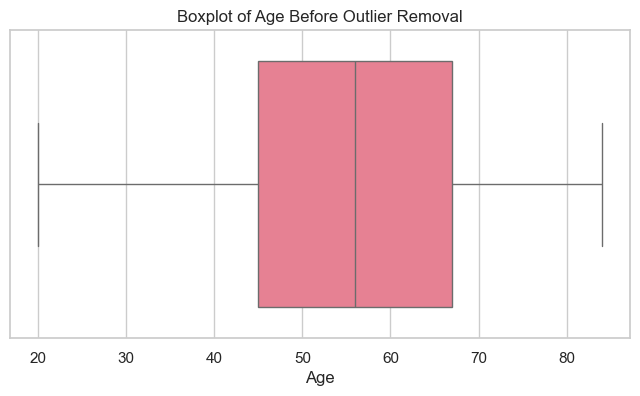

In [51]:
#Visualization Before Removal
plt.figure(figsize=(8,4))
sns.boxplot(x=dataset['Age'])
plt.title("Boxplot of Age Before Outlier Removal")
plt.show()

In [52]:
#IQR Method 
Q1 = dataset[continuous_cols].quantile(0.25)
Q3 = dataset[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower bound : ',lower_bound)
print('Upper bound : ',upper_bound)

Lower bound :  Age                     12.0
Composite_Risk_Score    -3.5
dtype: float64
Upper bound :  Age                     100.0
Composite_Risk_Score      8.5
dtype: float64


In [53]:
#Filter the data
dataset_clean = dataset[~((dataset[continuous_cols] < lower_bound) | (dataset[continuous_cols] > upper_bound)).any(axis=1)]

In [54]:
print(f"Original shape: {dataset.shape}")
print(f"After outlier removal: {dataset_clean.shape}")

Original shape: (70000, 32)
After outlier removal: (70000, 32)


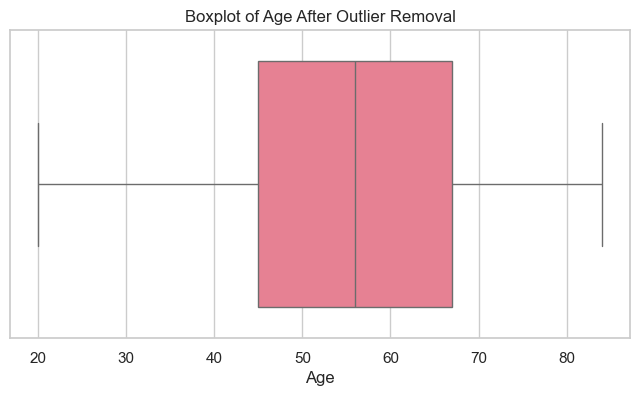

In [55]:
#Visualize cleaned data
plt.figure(figsize=(8,4))
sns.boxplot(x=dataset_clean['Age'])
plt.title("Boxplot of Age After Outlier Removal")
plt.show()

In [56]:

dataset_clean.to_csv("Outlier_Removal_output.csv", index=False)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [60]:
print("Original Dataset Shape:", df.shape)
print(df.head())

Original Dataset Shape: (70000, 19)
   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0                  1.0      0.0           1.0        0.0   
2         1.0                  0.0      0.0           1.0        0.0   
3         1.0                  1.0      0.0           1.0        0.0   
4         0.0                  0.0      1.0           0.0        1.0   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0       0.0                 0.0                 0.0      0.0   
1       0.0                 0.0                 0.0      1.0   
2       0.0                 0.0                 0.0      1.0   
3       0.0                 1.0                 1.0      1.0   
4       0.0                 0.0                 0.0      0.0   

   High_Cholesterol  Diabetes  Smoking  Obesity  Sedentary_Lifestyle  \
0               0.0       0.0      1.0      0.0                  1.0   
1 

In [61]:
df = pd.read_csv('Outlier_Removal_output.csv')

In [62]:
#Check Data Types
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numeric Columns:", list(numeric_cols))

Numeric Columns: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Heart_Risk', 'Composite_Risk_Score']


In [63]:

# Min-Max Normalization (0–1)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

In [64]:

print("\nMin-Max Normalized Data (first 5 rows):")
print(df_minmax.head())



Min-Max Normalized Data (first 5 rows):
   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0                  1.0      0.0           1.0        0.0   
2         1.0                  0.0      0.0           1.0        0.0   
3         1.0                  1.0      0.0           1.0        0.0   
4         0.0                  0.0      1.0           0.0        1.0   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0       0.0                 0.0                 0.0      0.0   
1       0.0                 0.0                 0.0      1.0   
2       0.0                 0.0                 0.0      1.0   
3       0.0                 1.0                 1.0      1.0   
4       0.0                 0.0                 0.0      0.0   

   High_Cholesterol  ...  High_BP_Label  High_Cholesterol_Label  \
0               0.0  ...             No                      No   
1      

In [65]:
#Standardization
std_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = std_scaler.fit_transform(df[numeric_cols])

print("\nStandardized Data (first 5 rows):")
print(df_standard.head())


Standardized Data (first 5 rows):
   Chest_Pain  Shortness_of_Breath   Fatigue  Palpitations  Dizziness  \
0   -0.998458            -1.001172 -0.997147      1.002546  -1.002833   
1   -0.998458             0.998829 -0.997147      1.002546  -1.002833   
2    1.001544            -1.001172 -0.997147      1.002546  -1.002833   
3    1.001544             0.998829 -0.997147      1.002546  -1.002833   
4   -0.998458            -1.001172  1.002861     -0.997460   0.997175   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea   High_BP  \
0 -0.997859           -1.003005           -1.004926 -0.994870   
1 -0.997859           -1.003005           -1.004926  1.005156   
2 -0.997859           -1.003005           -1.004926  1.005156   
3 -0.997859            0.997004            0.995098  1.005156   
4 -0.997859           -1.003005           -1.004926 -0.994870   

   High_Cholesterol  ...  High_BP_Label  High_Cholesterol_Label  \
0         -0.998430  ...             No                      No   
1

In [66]:

#Robust Scaling

robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[numeric_cols] = robust_scaler.fit_transform(df[numeric_cols])

print("\nRobust Scaled Data (first 5 rows):")
print(df_robust.head())
     


Robust Scaled Data (first 5 rows):
   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                 -1.0      0.0           1.0       -1.0   
1         0.0                  0.0      0.0           1.0       -1.0   
2         1.0                 -1.0      0.0           1.0       -1.0   
3         1.0                  0.0      0.0           1.0       -1.0   
4         0.0                 -1.0      1.0           0.0        0.0   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0       0.0                -1.0                -1.0      0.0   
1       0.0                -1.0                -1.0      1.0   
2       0.0                -1.0                -1.0      1.0   
3       0.0                 0.0                 0.0      1.0   
4       0.0                -1.0                -1.0      0.0   

   High_Cholesterol  ...  High_BP_Label  High_Cholesterol_Label  \
0               0.0  ...             No                      No   
1           

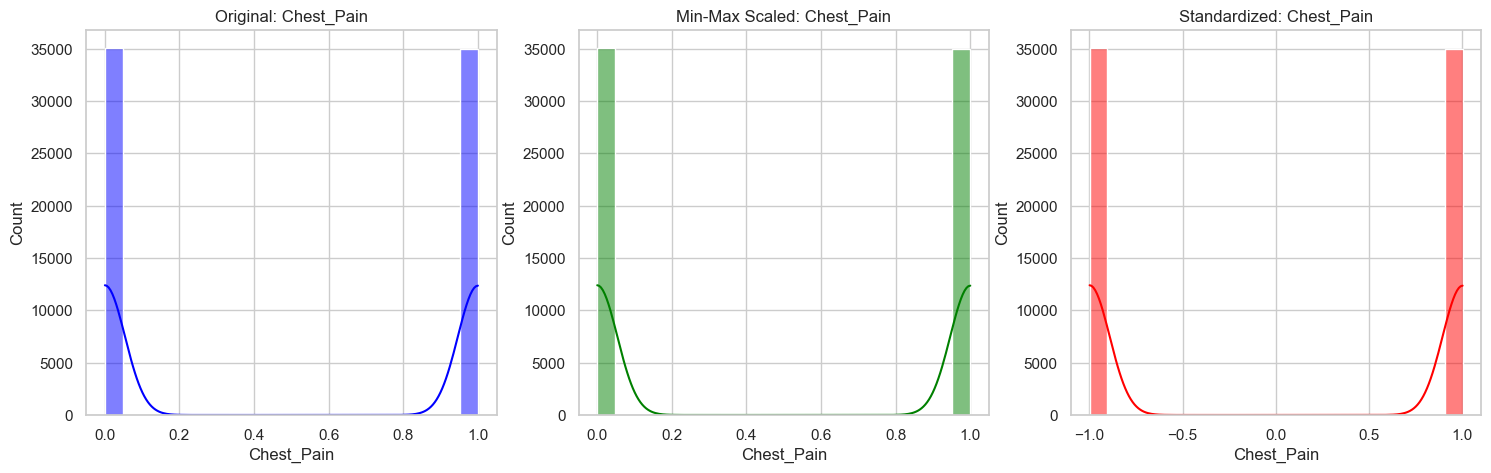

In [67]:
 #Visualization - Before vs After Scaling

col = numeric_cols[0]  # pick the first numeric column

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(df[col], kde=True, ax=axes[0], color="blue")
axes[0].set_title(f"Original: {col}")

sns.histplot(df_minmax[col], kde=True, ax=axes[1], color="green")
axes[1].set_title(f"Min-Max Scaled: {col}")

sns.histplot(df_standard[col], kde=True, ax=axes[2], color="red")
axes[2].set_title(f"Standardized: {col}")

plt.show()

In [76]:
#Save Scaled Versions
df_minmax.to_csv("Normalization_Scaling_output.csv", index=False)

In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Changed to MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [83]:
# Cell 2 (unchanged)
# Load the dataset
df = pd.read_csv("Normalization_Scaling_output.csv")

# Display basic information
print(f"Original shape: {df.shape}")
print("Original columns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Original shape: (70000, 32)
Original columns: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Heart_Risk', 'Gender_Label', 'Smoking_Label', 'Diabetes_Label', 'High_BP_Label', 'High_Cholesterol_Label', 'Obesity_Label', 'Sedentary_Lifestyle_Label', 'Family_History_Label', 'Chronic_Stress_Label', 'Chest_Pain_Label', 'Heart_Risk_Label', 'ChestPain_Typical', 'Composite_Risk_Score']

First few rows:
   Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0         0.0                  0.0      0.0           1.0        0.0   
1         0.0                  1.0      0.0           1.0        0.0   
2         1.0                  0.0      0.0           1.0        0.0   
3         1.0                  1.0      0.0           1.0        0.0   
4         0.0  

In [84]:
# Create a copy of the DataFrame
df_engineered = df.copy()

In [106]:
df_engineered['Age'] = df_engineered['Age'].fillna(df_engineered['Age'].median())

In [107]:
# Create composite risk factors
df_engineered['Metabolic_Risk'] = (df['Obesity'] + df['High_BP'] + 
                                   df['High_Cholesterol'] + df['Diabetes'])

df_engineered['Lifestyle_Risk'] = (df['Smoking'] + df['Sedentary_Lifestyle'] + 
                                   df['Chronic_Stress'])

df_engineered['Total_Risk_Factors'] = (df['Family_History'] + df['Smoking'] + 
                                       df['Diabetes'] + df['Obesity'] + df['High_BP'] + 
                                       df['High_Cholesterol'] + df['Sedentary_Lifestyle'] + 
                                       df['Chronic_Stress'])

In [108]:
# Create interaction features
df_engineered['Diabetes_Obesity'] = df['Diabetes'] * df['Obesity']
df_engineered['Smoking_High_BP'] = df['Smoking'] * df['High_BP']
df_engineered['Age_Diabetes'] = (df['Age'] > 50).astype(int) * df['Diabetes']
df_engineered['Family_Lifestyle'] = df['Family_History'] * df['Sedentary_Lifestyle']
df_engineered['Triple_Threat'] = df['Smoking'] * df['Diabetes'] * df['High_BP']

df_engineered['Male_High_Risk'] = df['Gender'] * (df['Age'] > 45).astype(int)
df_engineered['Female_High_Risk'] = (1 - df['Gender']) * (df['Age'] > 55).astype(int)

In [109]:
# Create risk level categories
df_engineered['Risk_Level_Low'] = (df_engineered['Total_Risk_Factors'] <= 2).astype(int)
df_engineered['Risk_Level_Medium'] = ((df_engineered['Total_Risk_Factors'] >= 3) & 
                                      (df_engineered['Total_Risk_Factors'] <= 5)).astype(int)
df_engineered['Risk_Level_High'] = (df_engineered['Total_Risk_Factors'] >= 6).astype(int)

In [110]:
# Create normalized age feature
scaler = MinMaxScaler()
df_engineered['Age_Normalized'] = scaler.fit_transform(df[['Age']].fillna(df['Age'].median())).flatten()

# Overwrite original Age with scaled version to match the output dataset
df_engineered['Age'] = df_engineered['Age_Normalized']
df_engineered = df_engineered.drop('Age_Normalized', axis=1)

In [111]:
# Add Composite_Risk_Score
df_engineered['Composite_Risk_Score'] = (df_engineered['High_BP'] + 
                                         df_engineered['High_Cholesterol'] + 
                                         df_engineered['Diabetes'] + 
                                         df_engineered['Smoking'] + 
                                         df_engineered['Obesity']) / 5

# Add label columns
df_engineered['Gender_Label'] = df_engineered['Gender'].map({0: 'Female', 1: 'Male'})

binary_cols = ['Smoking', 'Diabetes', 'High_BP', 'High_Cholesterol', 'Obesity', 
               'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress']
for col in binary_cols:
    df_engineered[col + '_Label'] = df_engineered[col].map({0: 'No', 1: 'Yes'})

df_engineered['Chest_Pain_Label'] = df_engineered['Chest_Pain'].map({0: 'Typical', 1: 'Atypical'})
df_engineered['Heart_Risk_Label'] = df_engineered['Heart_Risk'].map({0: 'Low', 1: 'High'})
df_engineered['ChestPain_Typical'] = df_engineered['Chest_Pain'].map({0: 'True', 1: 'False'})

In [112]:
# Feature engineering summary
original_features = df.shape[1]
new_features = df_engineered.shape[1]
engineered_features = new_features - original_features
print(f"\nOriginal features: {original_features}")
print(f"After feature engineering: {new_features}")
print(f"New features created: {engineered_features}")

new_feature_names = [col for col in df_engineered.columns if col not in df.columns]
print("\nNew features created:")
for i, feature in enumerate(new_feature_names, 1):
    print(f"  {i}. {feature}")


Original features: 32
After feature engineering: 49
New features created: 17

New features created:
  1. Age_Group_Young
  2. Age_Group_Middle
  3. Age_Group_Senior
  4. Age_Group_Elderly
  5. Metabolic_Risk
  6. Lifestyle_Risk
  7. Total_Risk_Factors
  8. Diabetes_Obesity
  9. Smoking_High_BP
  10. Age_Diabetes
  11. Family_Lifestyle
  12. Triple_Threat
  13. Male_High_Risk
  14. Female_High_Risk
  15. Risk_Level_Low
  16. Risk_Level_Medium
  17. Risk_Level_High


posx and posy should be finite values
posx and posy should be finite values


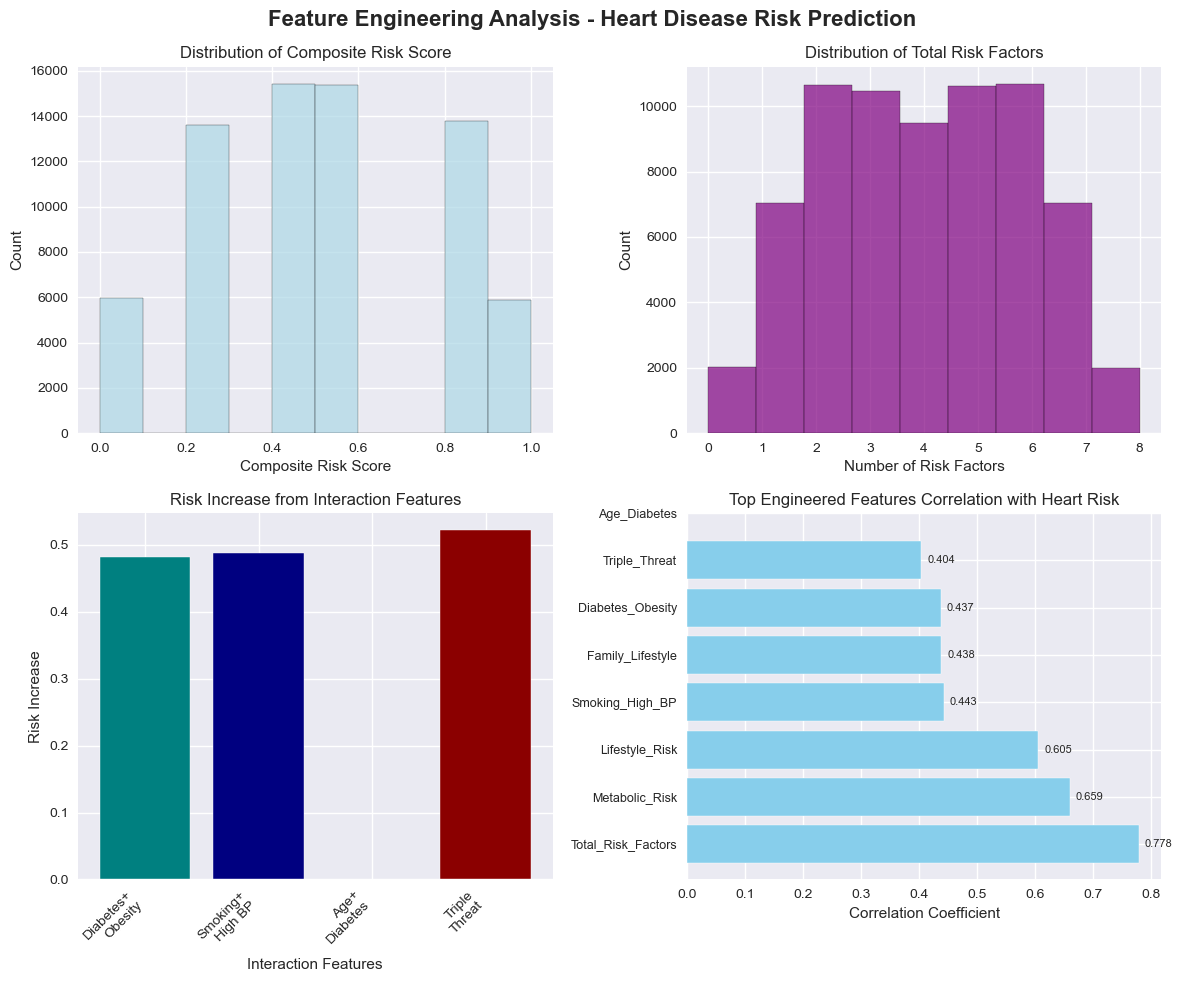

In [113]:
# Cell 11 (modified: replace age group plot with Composite_Risk_Score distribution)
# Create EDA visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Feature Engineering Analysis - Heart Disease Risk Prediction', fontsize=16, fontweight='bold')

# Plot 1: Distribution of Composite Risk Score
axes[0,0].hist(df_engineered['Composite_Risk_Score'], bins=10, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].set_title('Distribution of Composite Risk Score')
axes[0,0].set_xlabel('Composite Risk Score')
axes[0,0].set_ylabel('Count')

# Plot 2: Distribution of Total Risk Factors
axes[0,1].hist(df_engineered['Total_Risk_Factors'], bins=9, alpha=0.7, color='purple', edgecolor='black')
axes[0,1].set_title('Distribution of Total Risk Factors')
axes[0,1].set_xlabel('Number of Risk Factors')
axes[0,1].set_ylabel('Count')

# Plot 3: Risk Increase from Interaction Features
interaction_features = ['Diabetes_Obesity', 'Smoking_High_BP', 'Age_Diabetes', 'Triple_Threat']
interaction_data = []
for col in interaction_features:
    present_risk = df_engineered[df_engineered[col] == 1]['Heart_Risk'].mean()
    absent_risk = df_engineered[df_engineered[col] == 0]['Heart_Risk'].mean()
    interaction_data.append(present_risk - absent_risk)
bars3 = axes[1,0].bar(range(len(interaction_features)), interaction_data, color=['teal', 'navy', 'maroon', 'darkred'])
axes[1,0].set_title('Risk Increase from Interaction Features')
axes[1,0].set_xlabel('Interaction Features')
axes[1,0].set_ylabel('Risk Increase')
axes[1,0].set_xticks(range(len(interaction_features)))
axes[1,0].set_xticklabels(['Diabetes+\nObesity', 'Smoking+\nHigh BP', 'Age+\nDiabetes', 'Triple\nThreat'], rotation=45, ha='right')

# Plot 4: Top Engineered Features Correlation with Heart Risk
new_numeric_features = [col for col in new_feature_names if df_engineered[col].dtype in ['int64', 'float64']]
correlation_data = df_engineered[new_numeric_features + ['Heart_Risk']].corr()['Heart_Risk'].sort_values(ascending=False)
top_correlations = correlation_data[correlation_data.index != 'Heart_Risk'].head(8)
bars4 = axes[1,1].barh(range(len(top_correlations)), top_correlations.values, color='skyblue')
axes[1,1].set_title('Top Engineered Features Correlation with Heart Risk')
axes[1,1].set_xlabel('Correlation Coefficient')
axes[1,1].set_yticks(range(len(top_correlations)))
axes[1,1].set_yticklabels(top_correlations.index, fontsize=9)
for i, (bar, value) in enumerate(zip(bars4, top_correlations.values)):
    axes[1,1].text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.3f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [116]:
# Risk distribution analysis
print("\nTotal Risk Factors Distribution:")
print(df_engineered['Total_Risk_Factors'].value_counts().sort_index())

print("\nRisk Level Distribution:")
print(f"Low Risk (≤2 factors): {df_engineered['Risk_Level_Low'].sum()} patients ({df_engineered['Risk_Level_Low'].mean()*100:.1f}%)")
print(f"Medium Risk (3-5 factors): {df_engineered['Risk_Level_Medium'].sum()} patients ({df_engineered['Risk_Level_Medium'].mean()*100:.1f}%)")
print(f"High Risk (≥6 factors): {df_engineered['Risk_Level_High'].sum()} patients ({df_engineered['Risk_Level_High'].mean()*100:.1f}%)")


Total Risk Factors Distribution:
Total_Risk_Factors
0.0     2011
1.0     7051
2.0    10662
3.0    10471
4.0     9482
5.0    10622
6.0    10679
7.0     7038
8.0     1984
Name: count, dtype: int64

Risk Level Distribution:
Low Risk (≤2 factors): 19724 patients (28.2%)
Medium Risk (3-5 factors): 30575 patients (43.7%)
High Risk (≥6 factors): 19701 patients (28.1%)


In [118]:
# Save the engineered dataset
df_engineered.to_csv('Feature_Engineering_output.csv', index=False)
print(f"\nEngineered dataset saved with shape: {df_engineered.shape}")


Engineered dataset saved with shape: (70000, 49)


In [126]:

# -------------------------
# 1. Import Libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [127]:

# 2. Load Dataset
# -------------------------
df = pd.read_csv("Feature_Engineering_output.csv")

print(f"Shape: {df.shape}")
print("Columns:", df.columns)
print(df.head())

Shape: (70000, 49)
Columns: Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk', 'Gender_Label', 'Smoking_Label', 'Diabetes_Label',
       'High_BP_Label', 'High_Cholesterol_Label', 'Obesity_Label',
       'Sedentary_Lifestyle_Label', 'Family_History_Label',
       'Chronic_Stress_Label', 'Chest_Pain_Label', 'Heart_Risk_Label',
       'ChestPain_Typical', 'Composite_Risk_Score', 'Age_Group_Young',
       'Age_Group_Middle', 'Age_Group_Senior', 'Age_Group_Elderly',
       'Metabolic_Risk', 'Lifestyle_Risk', 'Total_Risk_Factors',
       'Diabetes_Obesity', 'Smoking_High_BP', 'Age_Diabetes',
       'Family_Lifestyle', 'Triple_Threat', 'Male_High_Risk',
       'Female_High_Risk', 'Risk_Level_Low', 'Risk_Level_Medium',
      

In [132]:
# add Age_scaled using StandardScaler on the already normalized Age
# -------------------------
# 3. Feature Scaling (Standardize Age, even if already MinMax normalized)
# -------------------------
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

In [133]:
# define X using only numeric columns to exclude string labels
# 4. Prepare Data
# Select only numeric columns for features, excluding target
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Heart_Risk')
X = df[numeric_cols]
y = df['Heart_Risk']

print(f"Features shape: {X.shape}")
print("Numeric features:", X.columns.tolist())

Features shape: (70000, 37)
Numeric features: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Composite_Risk_Score', 'Age_Group_Young', 'Age_Group_Middle', 'Age_Group_Senior', 'Age_Group_Elderly', 'Metabolic_Risk', 'Lifestyle_Risk', 'Total_Risk_Factors', 'Diabetes_Obesity', 'Smoking_High_BP', 'Age_Diabetes', 'Family_Lifestyle', 'Triple_Threat', 'Male_High_Risk', 'Female_High_Risk', 'Risk_Level_Low', 'Risk_Level_Medium', 'Risk_Level_High', 'Age_scaled']


In [134]:
# 5. Variance Threshold
var_selector = VarianceThreshold(threshold=0.01)
X_var = var_selector.fit_transform(X)

print(f"Features after variance threshold: {X_var.shape[1]}")

Features after variance threshold: 30


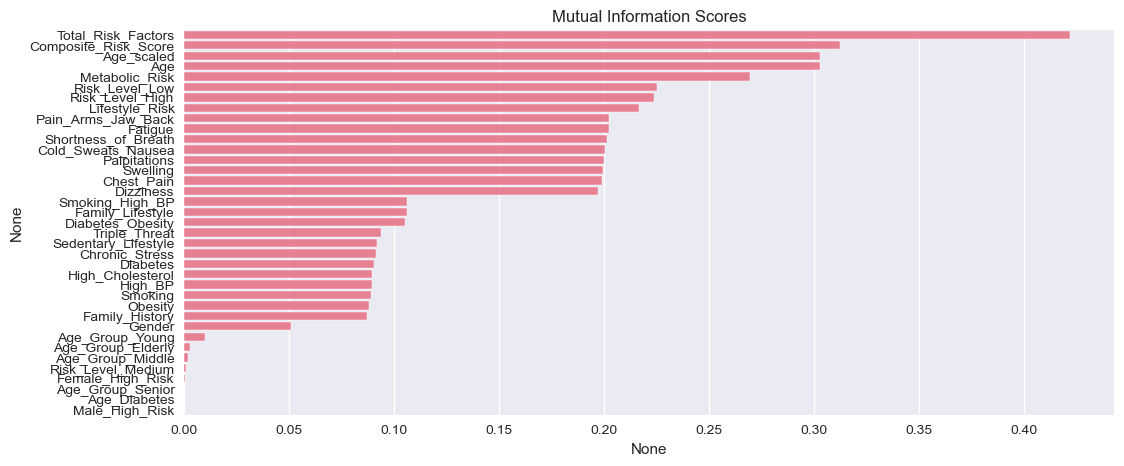

In [135]:
# 6. Mutual Information
# -------------------------
mi_scores = mutual_info_classif(X, y)
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=mi_df, y=mi_df.index)
plt.title("Mutual Information Scores")
plt.show()

In [136]:
# 7. ANOVA F-test
anova_selector = SelectKBest(f_classif, k=10)
X_anova = anova_selector.fit_transform(X, y)

print(f"Features after ANOVA: {X_anova.shape[1]}")

Features after ANOVA: 10


In [137]:

# 8. Recursive Feature Elimination (RFE)
# Scale all features for RFE with Logistic Regression
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe_selector.fit(scaled_data, y)

rfe_features = X.columns[rfe_selector.support_].tolist()
print("RFE Selected Features:", rfe_features)

RFE Selected Features: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'Age', 'Total_Risk_Factors']


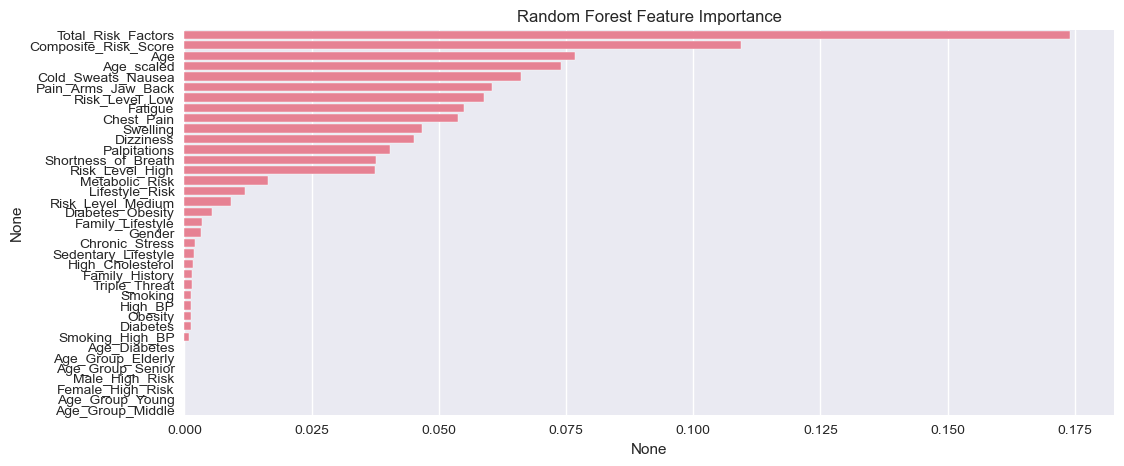

In [138]:
# 9. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance scores
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Random Forest Feature Importance")
plt.show()

In [139]:
# Cell 10 (unchanged, but now selects from engineered numeric features)
# -------------------------
# Select Final Features (example: Random Forest top 10)
# -------------------------
final_features = importances.head(10).index.tolist()

print("Final Selected Features:", final_features)

# Create final dataset with selected features + target
df_final = df[final_features + ['Heart_Risk']]

# Save to CSV file
df_final.to_csv("FeatureSelection_output.csv", index=False)

print("Final dataset saved as 'FeatureSelection_output.csv'")
df_final.head()

Final Selected Features: ['Total_Risk_Factors', 'Composite_Risk_Score', 'Age', 'Age_scaled', 'Cold_Sweats_Nausea', 'Pain_Arms_Jaw_Back', 'Risk_Level_Low', 'Fatigue', 'Chest_Pain', 'Swelling']
Final dataset saved as 'IT24101205_FeatureSelection.csv'


,Total_Risk_Factors,Composite_Risk_Score,Age,Age_scaled,Cold_Sweats_Nausea,Pain_Arms_Jaw_Back,Risk_Level_Low,Fatigue,Chest_Pain,Swelling,Heart_Risk
0,2.0,0.2,0.437500,-0.393767,0.0,0.0,1,0.0,0.0,0.0,0.0
1,3.0,0.6,0.406250,-0.515639,0.0,0.0,0,0.0,0.0,0.0,0.0
2,5.0,0.8,0.718750,0.703080,0.0,0.0,0,0.0,1.0,0.0,0.0
3,6.0,0.6,0.625000,0.337464,1.0,1.0,0,0.0,1.0,0.0,1.0
4,1.0,0.2,0.765625,0.885888,0.0,0.0,1,1.0,0.0,0.0,0.0


In [147]:
# 1. Import Libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [156]:
# Load cleaned dataset 

df = pd.read_csv('FeatureSelection_output.csv')

# Quick peek
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (70000, 11)


,Total_Risk_Factors,Composite_Risk_Score,Age,Age_scaled,Cold_Sweats_Nausea,Pain_Arms_Jaw_Back,Risk_Level_Low,Fatigue,Chest_Pain,Swelling,Heart_Risk
0,2.0,0.2,0.437500,-0.393767,0.0,0.0,1,0.0,0.0,0.0,0.0
1,3.0,0.6,0.406250,-0.515639,0.0,0.0,0,0.0,0.0,0.0,0.0
2,5.0,0.8,0.718750,0.703080,0.0,0.0,0,0.0,1.0,0.0,0.0
3,6.0,0.6,0.625000,0.337464,1.0,1.0,0,0.0,1.0,0.0,1.0
4,1.0,0.2,0.765625,0.885888,0.0,0.0,1,1.0,0.0,0.0,0.0


In [157]:
# Basic dataset info 

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary statistics ---")
print(df.describe())

print("\n--- Missing values check ---")
print(df.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total_Risk_Factors    70000 non-null  float64
 1   Composite_Risk_Score  70000 non-null  float64
 2   Age                   70000 non-null  float64
 3   Age_scaled            70000 non-null  float64
 4   Cold_Sweats_Nausea    70000 non-null  float64
 5   Pain_Arms_Jaw_Back    70000 non-null  float64
 6   Risk_Level_Low        70000 non-null  int64  
 7   Fatigue               70000 non-null  float64
 8   Chest_Pain            70000 non-null  float64
 9   Swelling              70000 non-null  float64
 10  Heart_Risk            70000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 5.9 MB
None

--- Summary statistics ---
       Total_Risk_Factors  Composite_Risk_Score           Age    Age_scaled  \
count        70000.000000          70000.00

In [158]:
#No missing values were found. Therefore, the cleaned dataset is identical to the original.

# Prepare features and target 
X = df.drop("Heart_Risk", axis=1)  # features
y = df["Heart_Risk"]               # target

# Standardize features (important for PCA) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with all components 
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

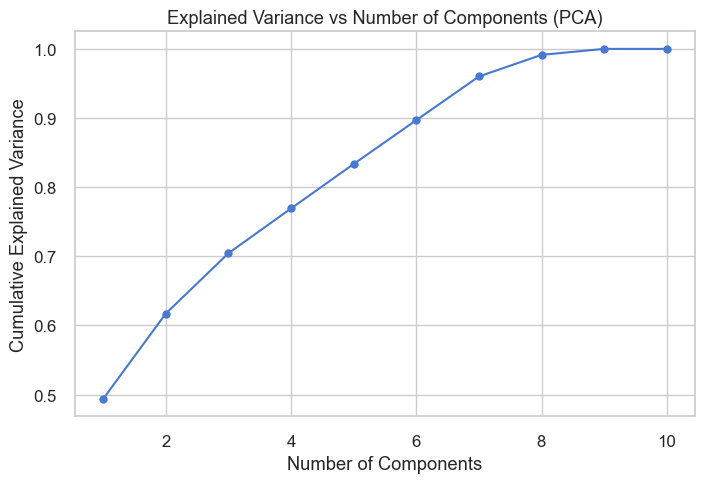

In [159]:
# Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components (PCA)")
plt.grid(True)
plt.show()

In [160]:
# Reduce dimensions keeping 95% variance 
pca95 = PCA(n_components=0.95)   # keep 95% variance
X_pca95 = pca95.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape (95% variance):", X_pca95.shape)

Original shape: (70000, 10)
Reduced shape (95% variance): (70000, 7)


In [164]:
# Save the reduced dataset
df_reduced.to_csv("PCA_Final_Output.csv", index=False)
print("Reduced dataset saved as 'PCA_Final_Output.csv'")

Reduced dataset saved as 'PCA_Final_Output.csv'
